In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('titanic.csv')
df.head(3)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S

In [3]:
df.shape

(891, 12)

In [4]:
df.describe(include='all')

PassengerId    Survived      Pclass  \
count    891.000000  891.000000  891.000000   
unique          NaN         NaN         NaN   
top             NaN         NaN         NaN   
freq            NaN         NaN         NaN   
mean     446.000000    0.383838    2.308642   
std      257.353842    0.486592    0.836071   
min        1.000000    0.000000    1.000000   
25%      223.500000    0.000000    2.000000   
50%      446.000000    0.000000    3.000000   
75%      668.500000    1.000000    3.000000   
max      891.000000    1.000000    3.000000   

                                                  Name   Sex         Age  \
count                                              891   891  714.000000   
unique                                             891     2         NaN   
top     Morley, Mr. Henry Samuel ("Mr Henry Marshall")  male         NaN   
freq                                                 1   577         NaN   
mean                                               NaN   NaN   29.699118   
std                                                NaN   NaN   14.526497   
min                                                NaN   NaN    0.420000   
25%                                                NaN   NaN   20.125000   
50%                                                NaN   NaN   28.000000   
75%                                                NaN   NaN   38.000000   
max                                                NaN   NaN   80.000000   

             SibSp       Parch  Ticket        Fare    Cabin Embarked  
count   891.000000  891.000000     891  891.000000      204      889  
unique         NaN         NaN     681         NaN      147        3  
top            NaN         NaN  347082         NaN  B96 B98        S  
freq           NaN         NaN       7         NaN        4      644  
mean      0.523008    0.381594     NaN   32.204208      NaN      NaN  
std       1.102743    0.806057     NaN   49.693429      NaN      NaN  
min       0.000000    0.000000     NaN    0.000000      NaN      NaN  
25%       0.000000    0.000000     NaN    7.910400      NaN      NaN  
50%       0.000000    0.000000     NaN   14.454200      NaN      NaN  
75%       1.000000    0.000000     NaN   31.000000      NaN      NaN  
max       8.000000    6.000000     NaN  512.329200      NaN      NaN

In [5]:
#Unique values in servived column
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [6]:
##Unique values in Pclass column
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [7]:
# Checking for null values
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
#As around 77% values are null in Cabin column, we drop it
df.drop('Cabin', axis=1, inplace=True)
df.shape

(891, 11)

In [9]:
#Checking mode in Embarked column
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [10]:
#Replacing null values in Embarked column
df['Embarked'].fillna('S', inplace=True)

In [11]:
#Calculating average age of each class
avg_1_age = np.mean(df['Age'][df['Pclass']==1])
avg_2_age = np.mean(df['Age'][df['Pclass']==2])
avg_3_age = np.mean(df['Age'][df['Pclass']==3])

In [12]:
#Creating a function to replace null values in age colunm with respect to class
def fillage(dtf):
    x = dtf[0]
    y = dtf[1]
    if pd.isna(x):
        if y == 1:
            return avg_1_age
        elif y == 2:
            return avg_2_age
        else:
            return avg_3_age
    else:
        return x

In [13]:
df['Age'] = df[['Age', 'Pclass']].apply(fillage, axis=1)

In [14]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [15]:
df.duplicated().sum()

0

# Using visualization

In [16]:
#Show male and female counts using bar graph
gender_count = df['Sex'].value_counts()
gender_count

male      577
female    314
Name: Sex, dtype: int64

In [17]:
gender_count.index

Index(['male', 'female'], dtype='object')

In [18]:
fig = plt.figure(figsize=(5,5))
plt.pie(gender_count.values, labels=['Male','Female'], autopct='%0.1f%%', colors=['salmon','skyblue'],
       explode=[0.05,0])
plt.show()

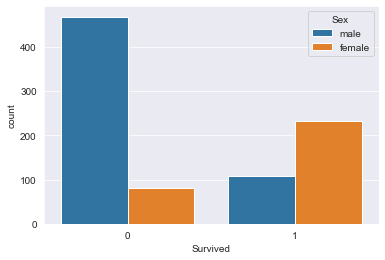

In [19]:
#Find gender wise bifurcation of survived and dead
sns.set_style('darkgrid')
sns.countplot(x='Survived', hue='Sex', data=df)
plt.show()

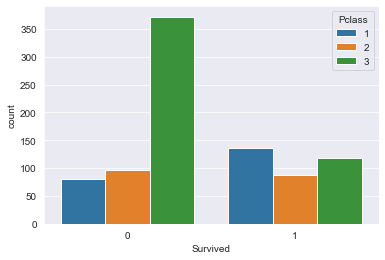

In [20]:
#Find class wise bifurcation of survived and dead
sns.set_style('darkgrid')
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.show()

In [21]:
class_divide = df['Pclass'].value_counts()
fig = plt.figure(figsize=(5,5))
plt.pie(class_divide.values, labels=['3rd','1st','2nd'], autopct='%0.1f%%', 
        colors=['salmon','skyblue','lightgreen'], explode=[0.01,0,0])
plt.show()

In [22]:
#Calculating average fare of each class
avg_1_fare = np.mean(df['Fare'][df['Pclass']==1]) # 84.67
avg_2_fare = np.mean(df['Fare'][df['Pclass']==2]) #20.13
avg_3_fare = np.mean(df['Fare'][df['Pclass']==3]) #13.5

In [23]:
#or 
faress = df.groupby('Pclass')['Fare'].mean()
faress.index

Int64Index([1, 2, 3], dtype='int64', name='Pclass')

In [24]:
#Or
avg_fares=[]
for i in df['Pclass'].unique():
    avg_fares.append(np.mean(df[df['Pclass']==i].Fare))

In [25]:
fares = [avg_1_fare, avg_2_fare, avg_3_fare]

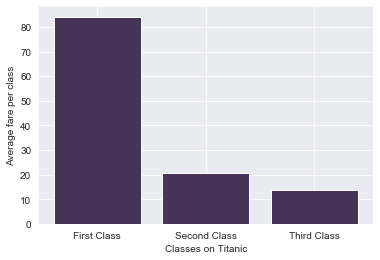

In [26]:
plt.bar(['First Class','Second Class','Third Class'], fares, color = '#453456')
plt.xlabel('Classes on Titanic')
plt.ylabel('Average fare per class')
plt.show()

In [34]:
#Distribution of Age 
plt.hist(df['Age'], bins=10, color='#dd35ff')
plt.show()

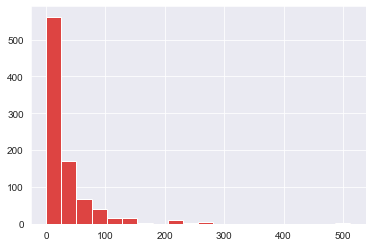

In [39]:
plt.hist(df['Fare'], bins=20, color = '#dd4442')
plt.show()

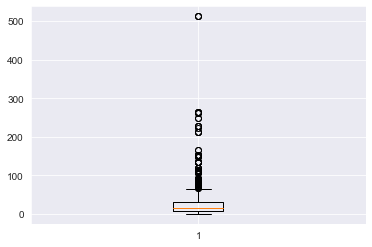

In [40]:
plt.boxplot(df['Fare'])
plt.show()

In [41]:
#Relationship between Age and Fare
plt.scatter(df['Age'], df['Fare'], color='Salmon')
plt.xlabel('Age of Passengers')
plt.ylabel('Fare of Voyage')
plt.show()